In [1]:
from functions import *
from methods import *
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
path = '/Users/irashokar/documents/NOvA/files/Feb_test/Descr_5/'
with open(path + 'history_SGD_5_descriminator_weights.pkl','rb') as f1:
    history = pkl.load(f1)

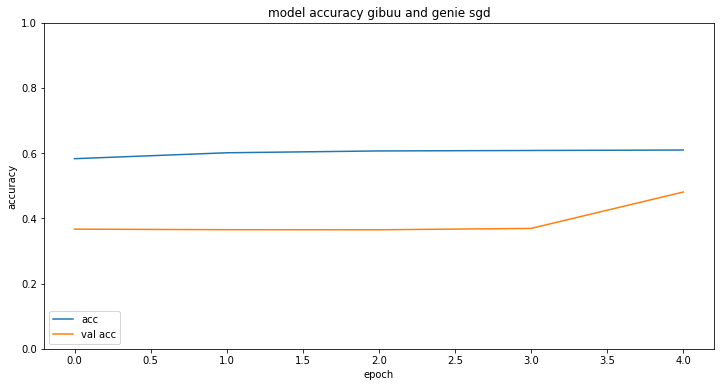

In [3]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy gibuu and genie sgd')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val acc'], loc='lower left')
plt.ylim(0,1)
plt.show()

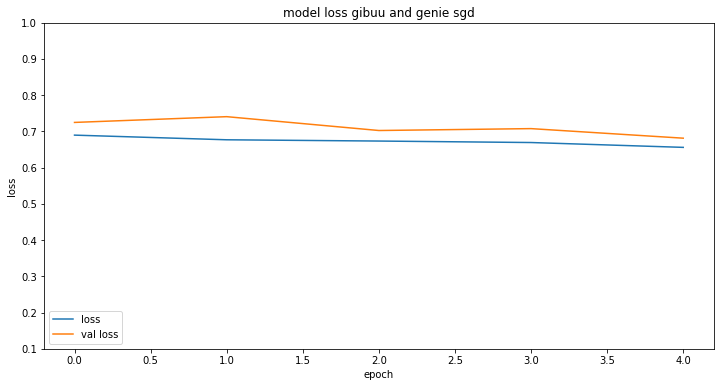

In [4]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss gibuu and genie sgd')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val loss'], loc='lower left')
plt.ylim(0.1,1.)
plt.show()

In [6]:
path = '/Users/irashokar/documents/NOvA/files/Feb_test/Descr_5/'
with open(path+ 'descr_probabilities_short_weights_SGD_5_descriminator_weights.pkl','rb') as f2:
    probabilities = pkl.load(f2)
print(len(probabilities))
with open(path+ 'descr_test_labels_list_short_weights_SGD_5_descriminator_weights.pkl','rb') as f3:
    test_labels = pkl.load(f3)
print(len(test_labels))
with open(path+ 'descr_test_weights_list_short_weights_SGD_5_descriminator_weights.pkl','rb') as f4:
    gibuu_weights = pkl.load(f4)

14624
29288


In [7]:
probabilities[:-100]

array([[0.45071617, 0.54928386],
       [0.53286344, 0.46713653],
       [0.53278494, 0.4672151 ],
       ...,
       [0.25729054, 0.74270946],
       [0.5073148 , 0.4926852 ],
       [0.4282827 , 0.5717173 ]], dtype=float32)

In [8]:
predictions = []
for i in probabilities:
    max_index =np.where(i == np.max(i))[0][0]
    predictions.append(max_index)
    
test_vals = []
for i in test_labels:
    max_index =np.where(i == np.max(i))[0][0]
    test_vals.append(max_index)
    
#accuracy
acc = 0
for i in range(len(probabilities)):
    if test_vals[i]==predictions[i]:
        acc+=1
    else:
        pass
acc/=len(test_vals)

true_val = probabilities

print('Probabilities: \n')
print('Accuracy:{} \n'.format(acc))
for i in range(10):
    print(probabilities[i], '\n')
print('Predictions: \n')
print(predictions[:10], '\n')
print('Truth labels: \n')
print(test_vals[:10])

Probabilities: 

Accuracy:0.21312482928161705 

[0.45071617 0.54928386] 

[0.53286344 0.46713653] 

[0.53278494 0.4672151 ] 

[0.4414816  0.55851847] 

[0.5196613  0.48033866] 

[0.5000113  0.49998873] 

[0.46641454 0.5335855 ] 

[0.45330086 0.5466991 ] 

[0.50839 0.49161] 

[0.4288096  0.57119036] 

Predictions: 

[1, 0, 0, 1, 0, 0, 1, 1, 0, 1] 

Truth labels: 

[1, 0, 0, 0, 0, 0, 1, 0, 0, 0]


Text(0, 0.5, 'Count')

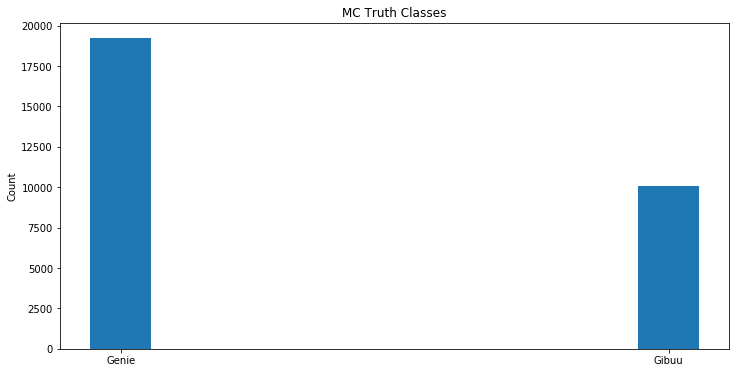

In [9]:
plt.figure(figsize=(12,6))
plt.hist(test_vals)
x = [0.05, 0.95]
class_names = ['Genie', 'Gibuu']
plt.xticks(x, class_names)
plt.title('MC Truth Classes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

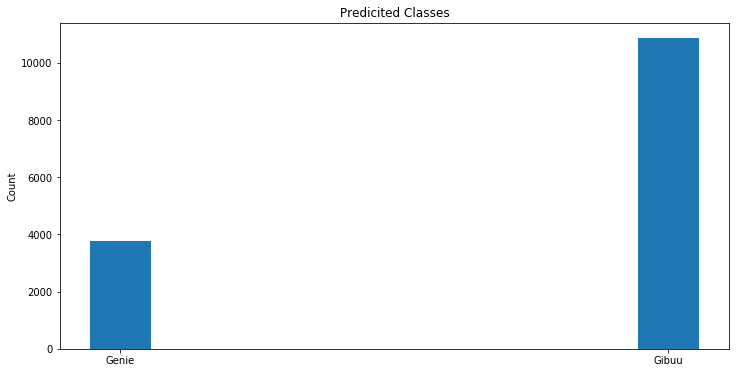

In [10]:
plt.figure(figsize=(12,6))
plt.hist(predictions)
plt.xticks(x, class_names)
plt.title('Predicited Classes')
plt.ylabel('Count')